[*********************100%%**********************]  1 of 1 completed


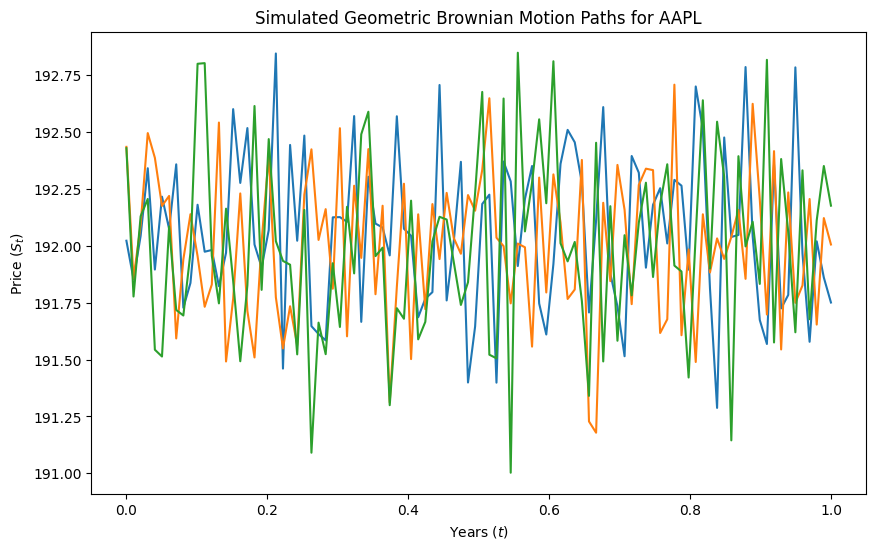

[*********************100%%**********************]  1 of 1 completed


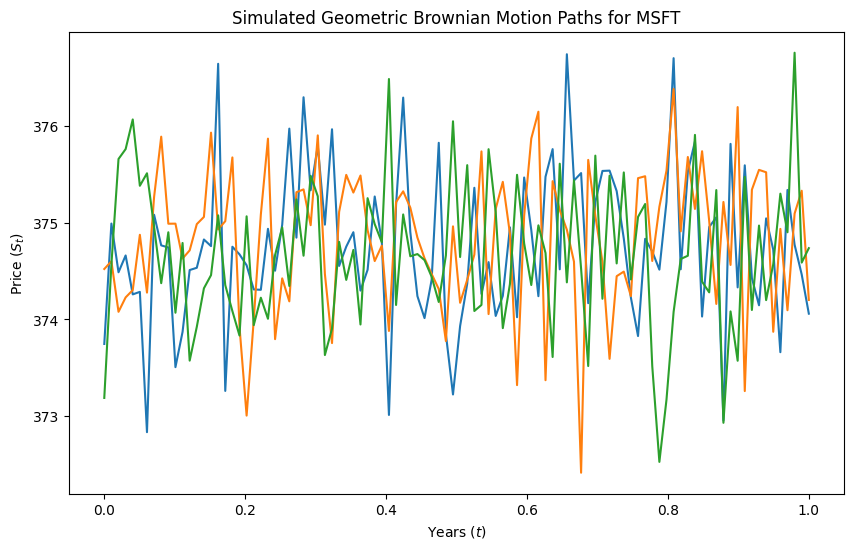

[*********************100%%**********************]  1 of 1 completed


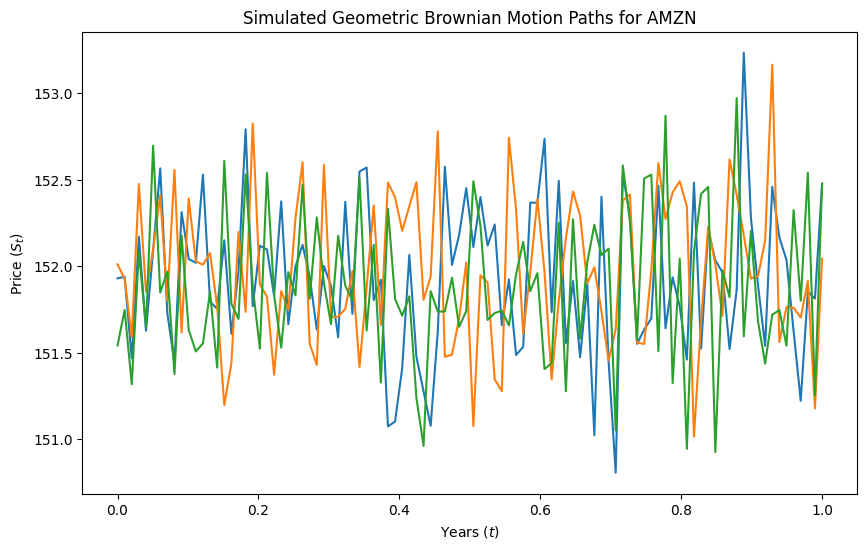

[*********************100%%**********************]  1 of 1 completed


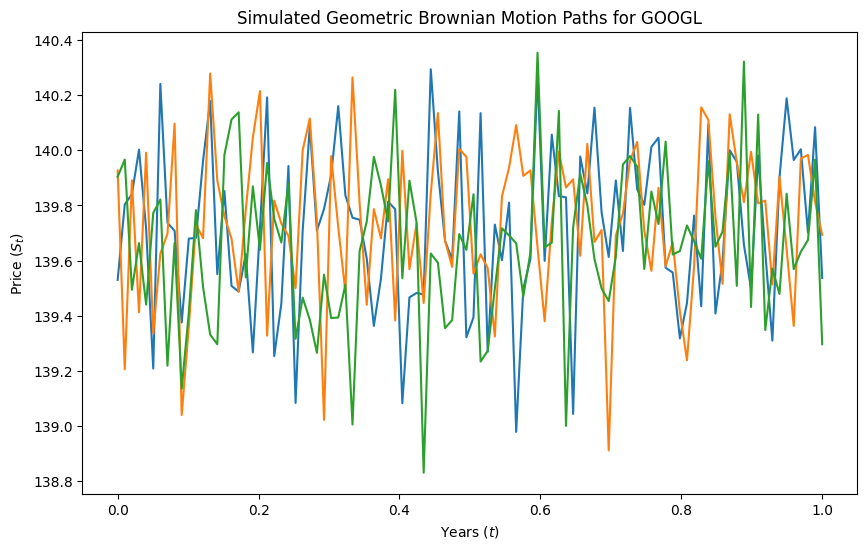

[*********************100%%**********************]  1 of 1 completed


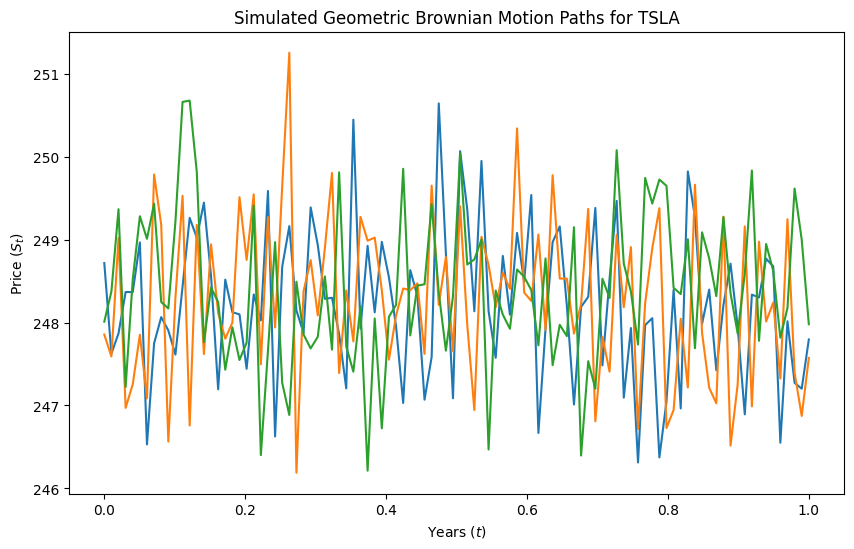

[*********************100%%**********************]  1 of 1 completed


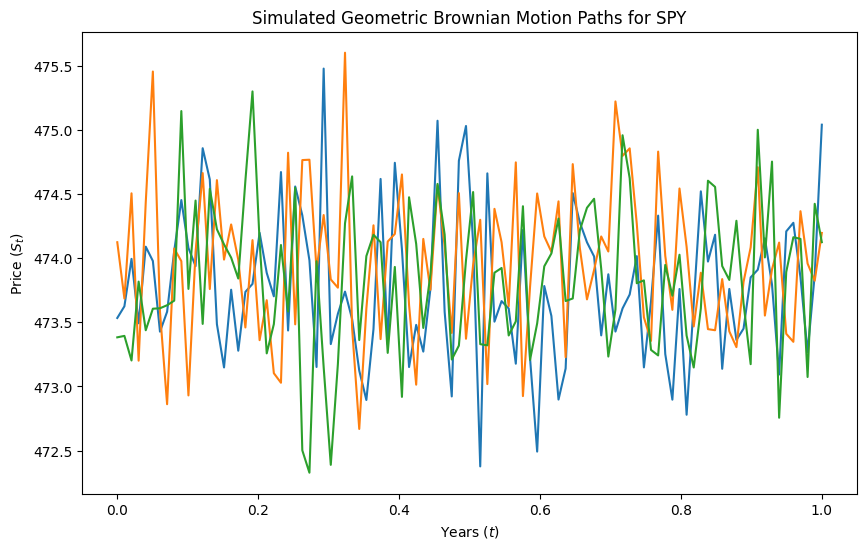

[*********************100%%**********************]  1 of 1 completed


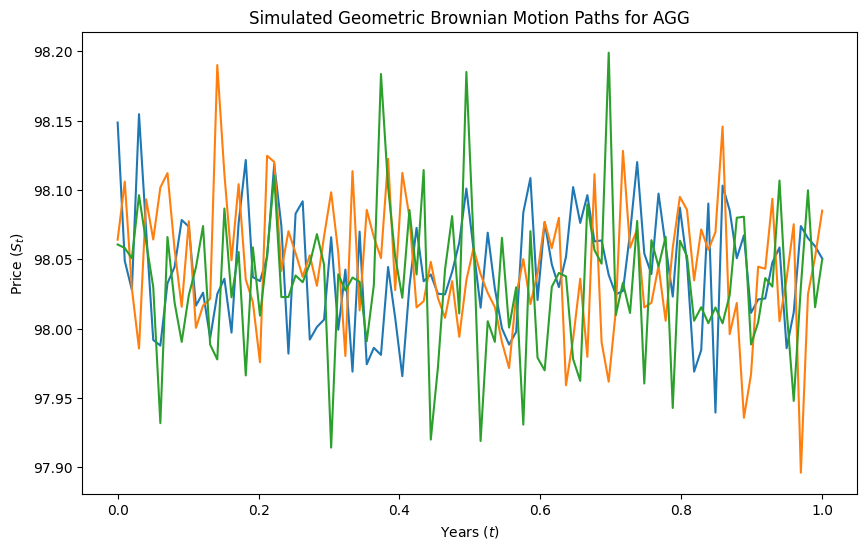

[*********************100%%**********************]  1 of 1 completed


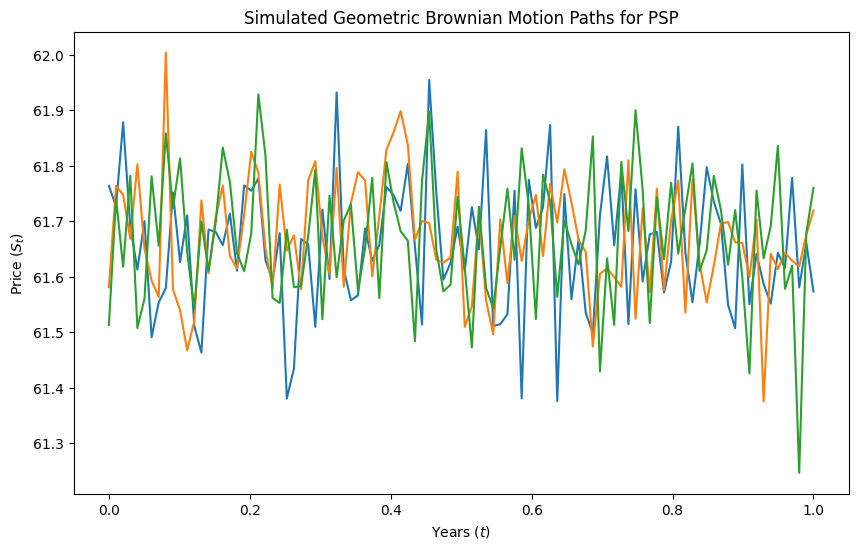

[*********************100%%**********************]  1 of 1 completed


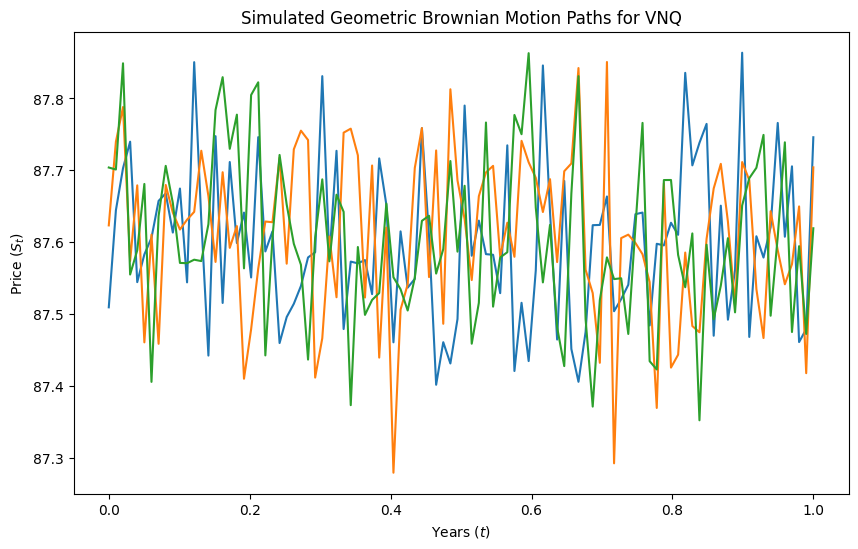

[*********************100%%**********************]  1 of 1 completed


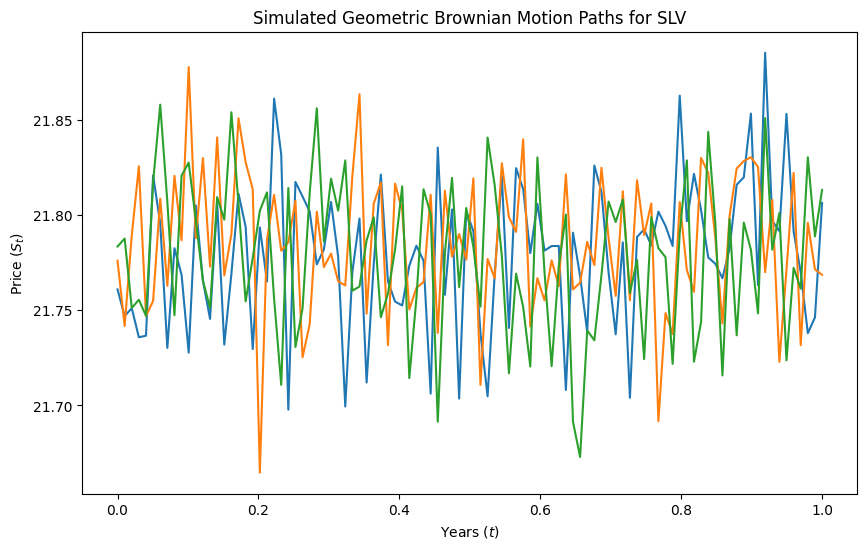

[*********************100%%**********************]  1 of 1 completed


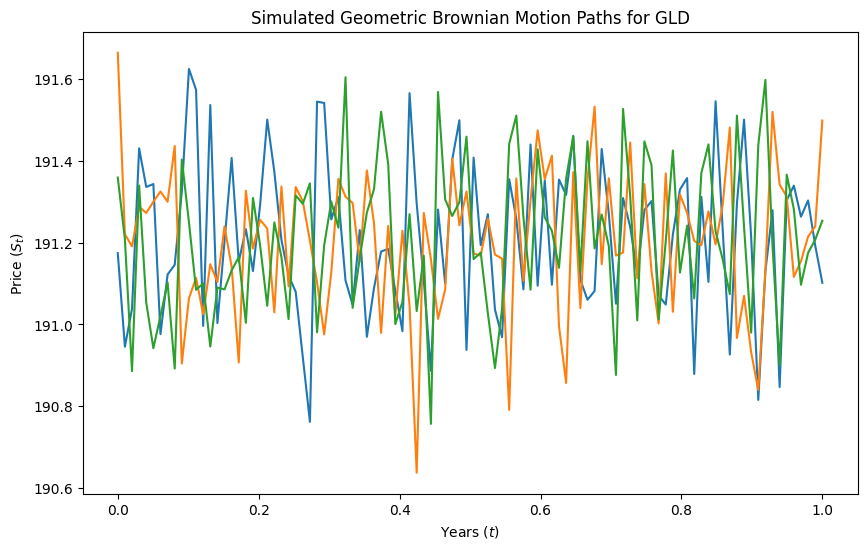

[*********************100%%**********************]  1 of 1 completed


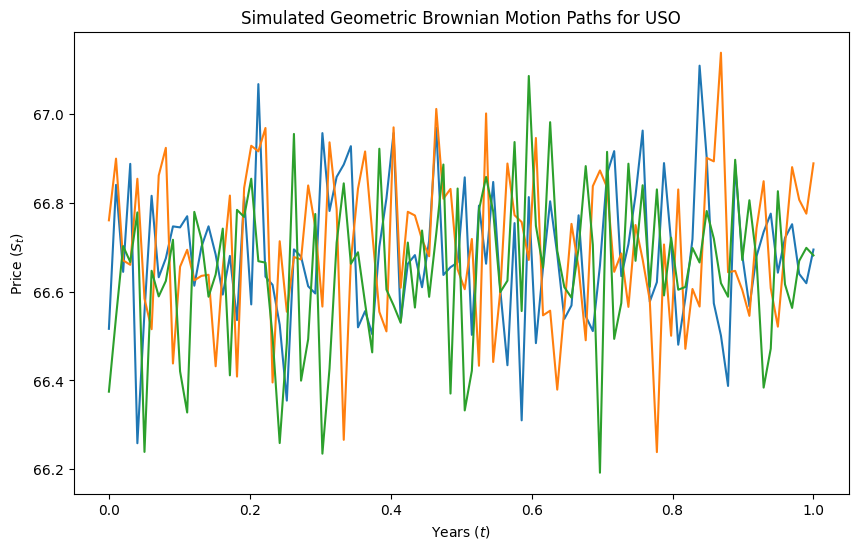

[*********************100%%**********************]  1 of 1 completed


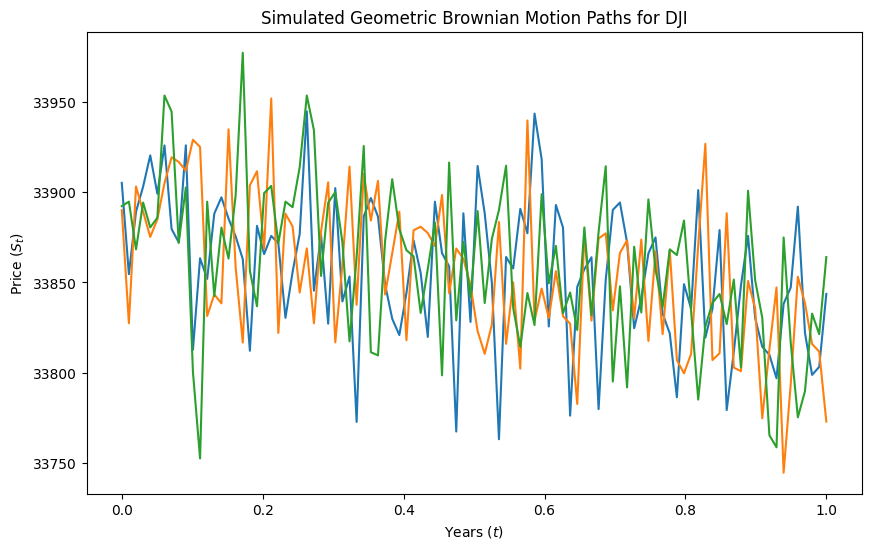

[*********************100%%**********************]  1 of 1 completed


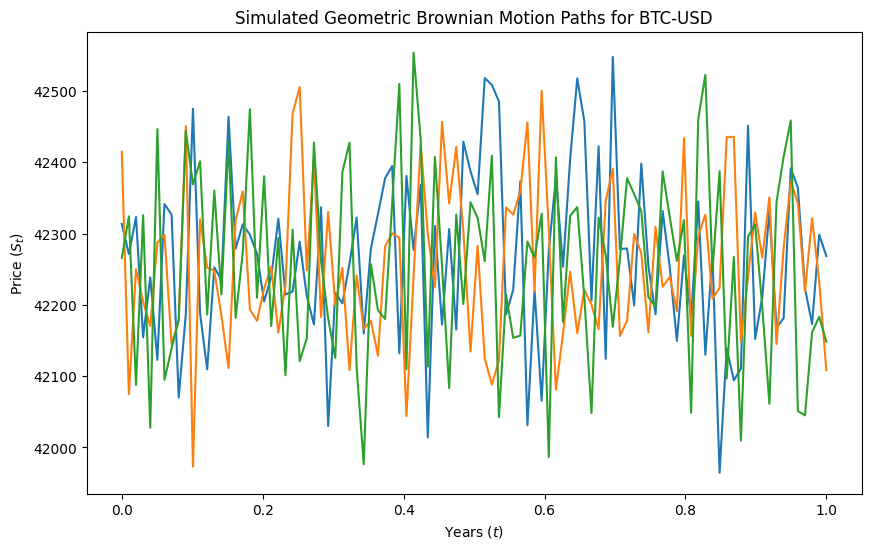

[*********************100%%**********************]  1 of 1 completed


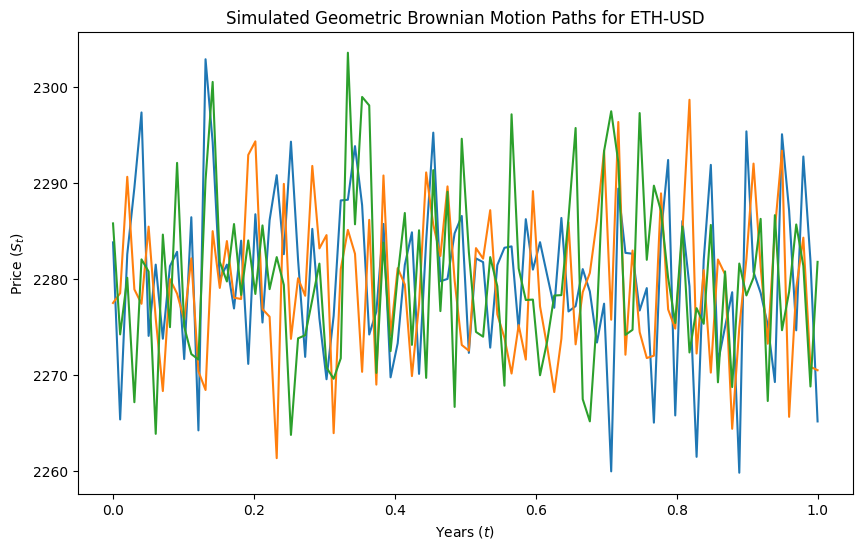

[*********************100%%**********************]  1 of 1 completed


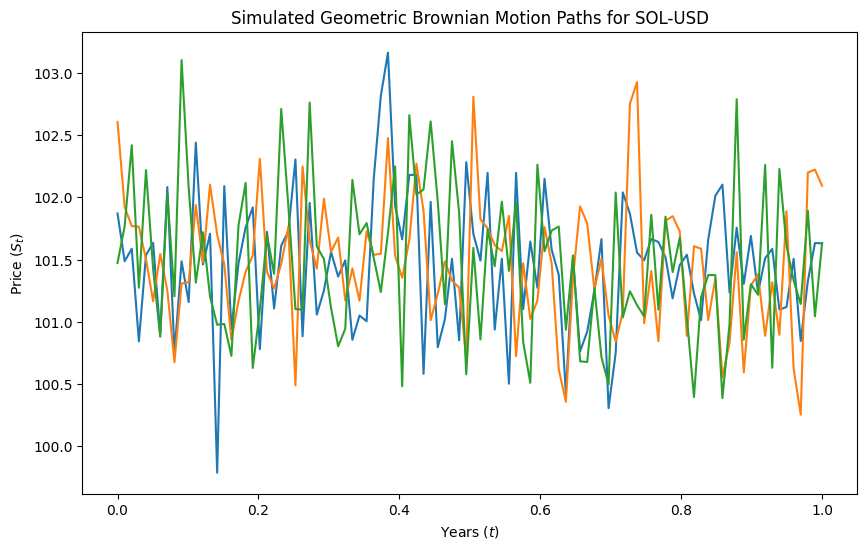

[*********************100%%**********************]  1 of 1 completed


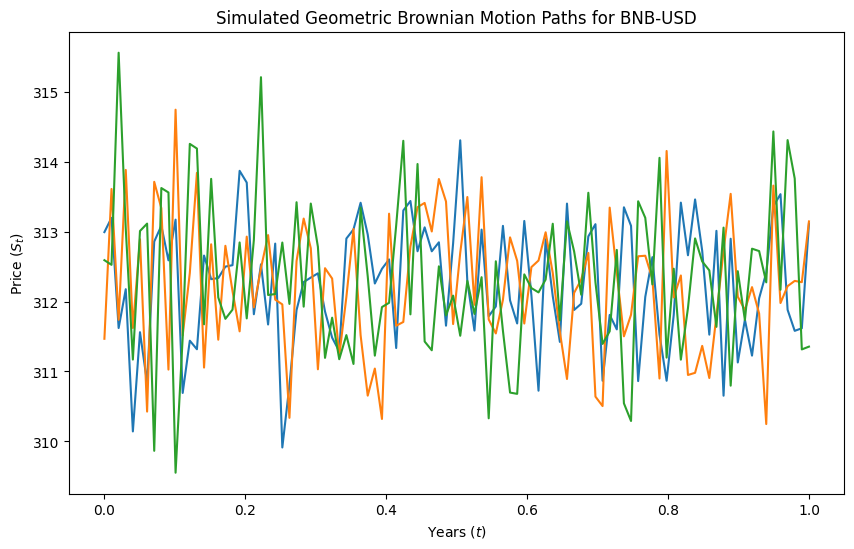

[*********************100%%**********************]  1 of 1 completed


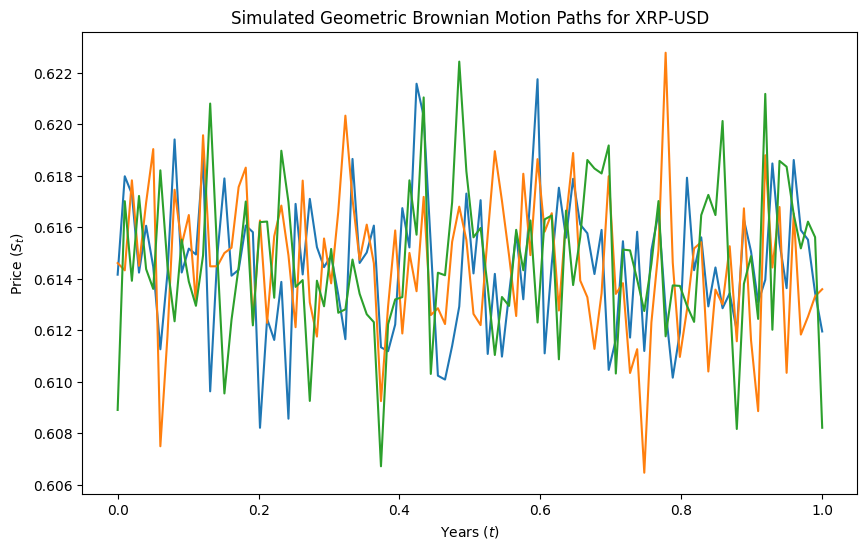

[*********************100%%**********************]  1 of 1 completed


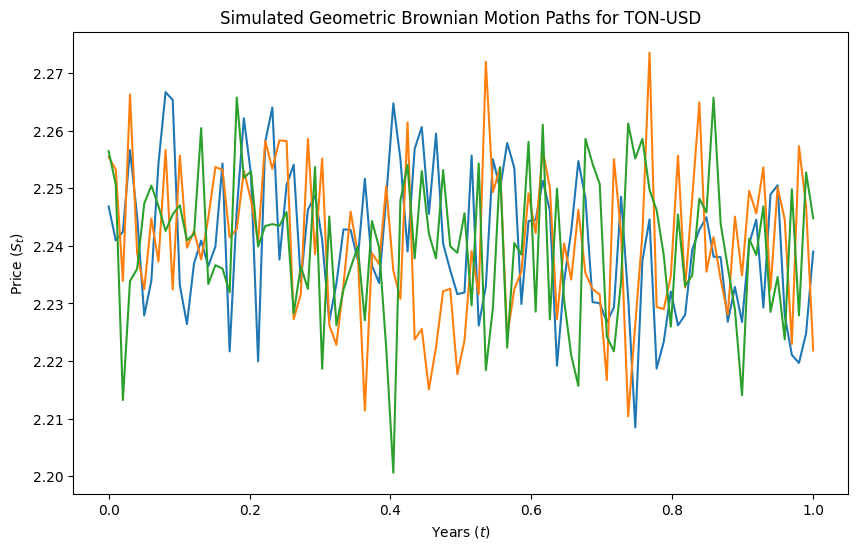

[*********************100%%**********************]  1 of 1 completed


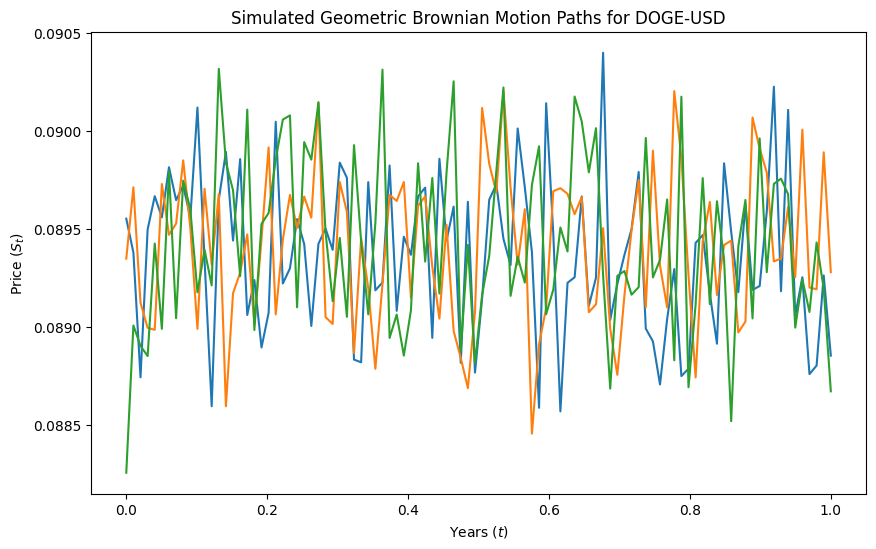

[*********************100%%**********************]  1 of 1 completed


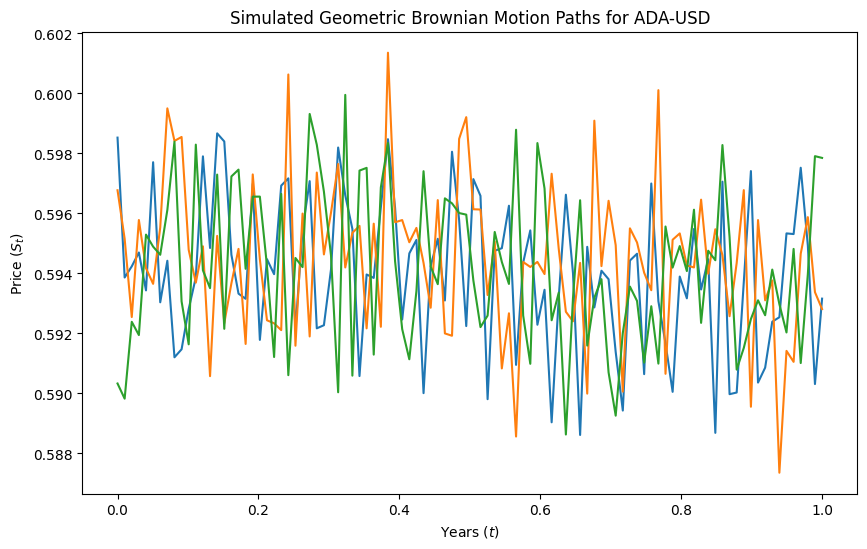

[*********************100%%**********************]  1 of 1 completed


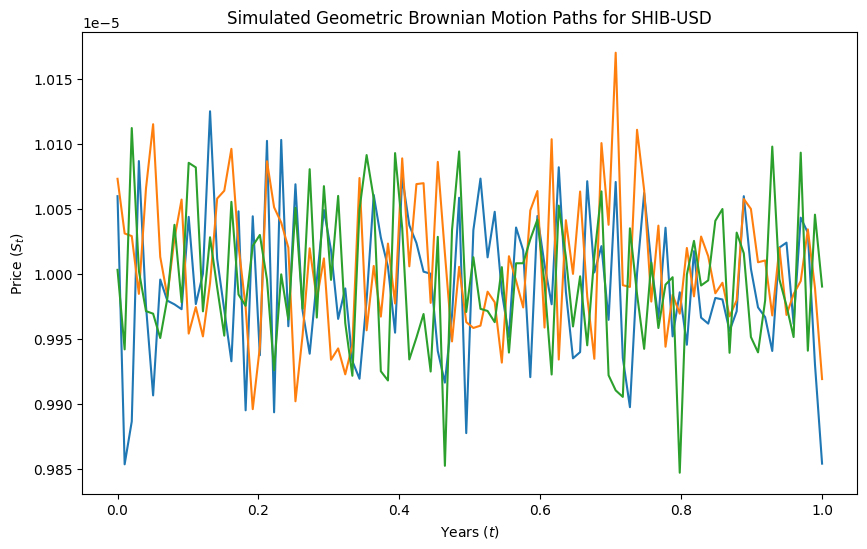

[*********************100%%**********************]  1 of 1 completed


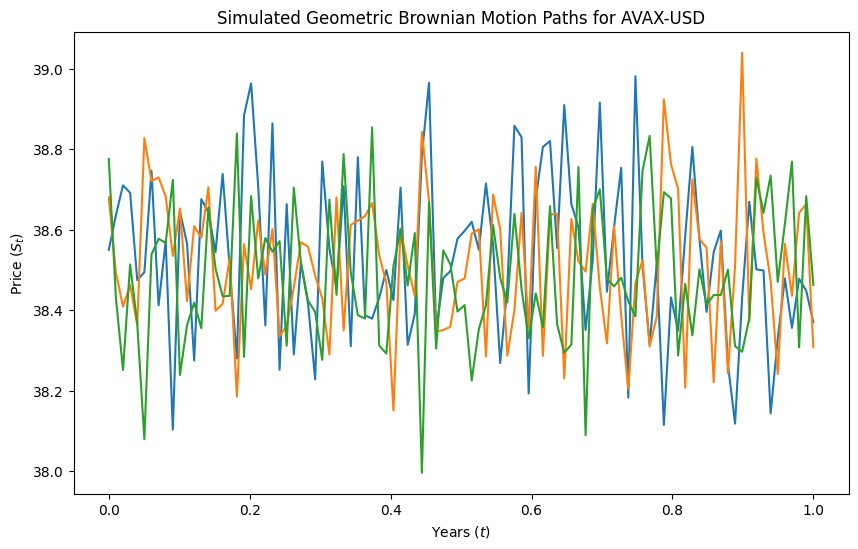

Parameters for GBM simulation:
            n  T  M
AAPL      100  1  3
MSFT      100  1  3
AMZN      100  1  3
GOOGL     100  1  3
TSLA      100  1  3
SPY       100  1  3
AGG       100  1  3
PSP       100  1  3
VNQ       100  1  3
SLV       100  1  3
GLD       100  1  3
USO       100  1  3
DJI       100  1  3
BTC-USD   100  1  3
ETH-USD   100  1  3
SOL-USD   100  1  3
BNB-USD   100  1  3
XRP-USD   100  1  3
TON-USD   100  1  3
DOGE-USD  100  1  3
ADA-USD   100  1  3
SHIB-USD  100  1  3
AVAX-USD  100  1  3


In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Function to retrieve historical prices for an asset
def get_historical_prices(asset, start_date, end_date):
    data = yf.download(asset, start=start_date, end=end_date)['Adj Close']
    return data

# Function to simulate Geometric Brownian Motion (GBM) for an asset
def simulate_gbm(mu, sigma, n, T, M, S0):
    # Calculate each time step
    dt = T / n
    
    # Simulate using numpy arrays
    W = np.random.normal(0, np.sqrt(dt), size=(n, M))
    time = np.linspace(0, T, n)
    exponential_term = (mu - 0.5 * sigma ** 2) * time
    stochastic_term = sigma * W.T
    St = S0 * np.exp(exponential_term + stochastic_term)
    
    return St, time

# Define the assets
assets = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'TSLA', 'SPY', 'AGG', 'PSP', 'VNQ', 'SLV', 'GLD', 'USO', 'DJI']
cryptos = ['BTC-USD', 'ETH-USD', 'SOL-USD', 'BNB-USD', 'XRP-USD', 'TON-USD', 'DOGE-USD', 'ADA-USD', 'SHIB-USD', 'AVAX-USD']

# Define the start and end dates
start_date = '2022-01-01'
end_date = '2024-01-01'

# Fixed parameters for GBM simulation
parameters = {
    'n': 100,  # Number of steps
    'T': 1,    # Time in years
    'M': 3    # Number of simulations
}

# Create DataFrame for parameters
parameters_df = pd.DataFrame(parameters, index=assets + cryptos)

# Retrieve historical prices and simulate GBM for each asset
for asset in assets + cryptos:
    # Retrieve historical prices
    data = get_historical_prices(asset, start_date, end_date)
    
    # Skip assets with missing data
    if data.empty:
        print(f"No data available for {asset}. Skipping...")
        continue
    
    # Calculate daily returns
    returns = data.pct_change().dropna()
    
    # Skip assets with insufficient data for returns calculation
    if returns.empty:
        print(f"Insufficient data for return calculation for {asset}. Skipping...")
        continue
    
    # Calculate mu and sigma dynamically
    mu = returns.mean()
    sigma = returns.std()
    
    # Get initial stock price (last available closing price)
    S0 = data.iloc[-1]
    
    # Get other parameters for the current asset
    n = parameters_df.loc[asset, 'n']
    T = parameters_df.loc[asset, 'T']
    M = parameters_df.loc[asset, 'M']
    
    # Simulate GBM
    St, time = simulate_gbm(mu, sigma, n, T, M, S0)
    
    # Plot GBM paths
    plt.figure(figsize=(10, 6))
    plt.plot(time, St.T)
    plt.xlabel("Years $(t)$")
    plt.ylabel("Price $(S_t)$")
    plt.title(f"Simulated Geometric Brownian Motion Paths for {asset}")
    plt.show()

# Display parameters DataFrame
print("Parameters for GBM simulation:")
print(parameters_df)


In [2]:
def calculate_statistics(asset_prices):
    # Convert asset_prices (St) into a DataFrame
    asset_prices_df = pd.DataFrame(asset_prices)
    
    # Descriptive statistics
    descriptive_stats = asset_prices_df.describe()
    
    # Volatility measures
    volatility_measures = pd.DataFrame()
    volatility_measures['Mean'] = asset_prices_df.mean()
    volatility_measures['Standard Deviation'] = asset_prices_df.std()
    volatility_measures['Skewness'] = asset_prices_df.skew()
    volatility_measures['Kurtosis'] = asset_prices_df.kurtosis()
    
    return descriptive_stats, volatility_measures

In [9]:
# Dictionary to store parameters for each asset
asset_parameters = {}
descriptive_stats_frame = {}
volatility_measures_frame = {}

# Retrieve historical prices and simulate GBM for each asset
for asset in assets + cryptos:
    # Retrieve historical prices
    data = get_historical_prices(asset, start_date, end_date)
    
    # Skip assets with missing data
    if data.empty:
        print(f"No data available for {asset}. Skipping...")
        continue
    
    # Calculate daily returns
    returns = data.pct_change().dropna()
    
    # Skip assets with insufficient data for returns calculation
    if returns.empty:
        print(f"Insufficient data for return calculation for {asset}. Skipping...")
        continue
    
    # Calculate mu and sigma dynamically
    mu = returns.mean()
    sigma = returns.std()
    
    # Get initial stock price (last available closing price)
    S0 = data.iloc[-1]
    
    # Get other parameters for the current asset
    n = parameters_df.loc[asset, 'n']
    T = parameters_df.loc[asset, 'T']
    M = parameters_df.loc[asset, 'M']
    
    # Simulate GBM
    n = int(parameters_df.loc[asset, 'n'])
    M = int(parameters_df.loc[asset, 'M'])
    
    St, time = simulate_gbm(mu, sigma, n, T, M, S0)

    # Calculate descriptive statistics and volatility measures
    # descriptive_stats, volatility_measures = calculate_statistics(St)

    # descriptive_stats_frame[asset] = descriptive_stats
    # volatility_measures_frame[asset] = volatility_measures    

    # Store parameters for the asset
    asset_parameters[asset] = {
        'mu': mu,
        'sigma': sigma,
        'n': n,
        'T': T,
        'M': M,
        'S0': S0
    }

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

Parameters Data:
                mu     sigma      n    T    M            S0
AAPL      0.000302  0.018316  100.0  1.0  3.0    192.024185
MSFT      0.000456  0.019355  100.0  1.0  3.0    374.670074
AMZN      0.000129  0.026819  100.0  1.0  3.0    151.940002
GOOGL     0.000167  0.021973  100.0  1.0  3.0    139.690002
TSLA     -0.000230  0.037905  100.0  1.0  3.0    248.479996
SPY       0.000128  0.012301  100.0  1.0  3.0    473.837769
AGG      -0.000143  0.004890  100.0  1.0  3.0     98.050163
PSP      -0.000143  0.017746  100.0  1.0  3.0     61.684540
VNQ      -0.000268  0.014241  100.0  1.0  3.0     87.611221
SLV       0.000206  0.017402  100.0  1.0  3.0     21.780001
GLD       0.000295  0.009028  100.0  1.0  3.0    191.169998
USO       0.000669  0.023522  100.0  1.0  3.0     66.650002
DJI      -0.001857  0.010484  100.0  1.0  3.0  33891.300781
BTC-USD   0.000246  0.028649  100.0  1.0  3.0  42265.187500
ETH-USD  -0.000023  0.036397  100.0  1.0  3.0   2281.471191
SOL-USD   0.000885  0.0

In [11]:

# Create DataFrames for parameters, descriptive statistics, and volatility measures
parameters_df = pd.DataFrame(asset_parameters).T



# Display asset data DataFrame
print("Parameters Data:")
print(parameters_df)

Parameters Data:
                mu     sigma      n    T    M            S0
AAPL      0.000302  0.018316  100.0  1.0  3.0    192.024185
MSFT      0.000456  0.019355  100.0  1.0  3.0    374.670074
AMZN      0.000129  0.026819  100.0  1.0  3.0    151.940002
GOOGL     0.000167  0.021973  100.0  1.0  3.0    139.690002
TSLA     -0.000230  0.037905  100.0  1.0  3.0    248.479996
SPY       0.000128  0.012301  100.0  1.0  3.0    473.837769
AGG      -0.000143  0.004890  100.0  1.0  3.0     98.050163
PSP      -0.000143  0.017746  100.0  1.0  3.0     61.684540
VNQ      -0.000268  0.014241  100.0  1.0  3.0     87.611221
SLV       0.000206  0.017402  100.0  1.0  3.0     21.780001
GLD       0.000295  0.009028  100.0  1.0  3.0    191.169998
USO       0.000669  0.023522  100.0  1.0  3.0     66.650002
DJI      -0.001857  0.010484  100.0  1.0  3.0  33891.300781
BTC-USD   0.000246  0.028649  100.0  1.0  3.0  42265.187500
ETH-USD  -0.000023  0.036397  100.0  1.0  3.0   2281.471191
SOL-USD   0.000885  0.0

In [10]:
# Generate simulated GBM paths for multiple assets
simulated_paths = {}

for asset in assets + cryptos:
    # Simulate GBM for each asset
    St, time = simulate_gbm(mu, sigma, n, T, M, S0)
    
    # Reshape the simulated paths into a 1-dimensional array
    simulated_paths[asset] = St.flatten()

# Convert simulated paths dictionary to DataFrame
simulated_paths_df = pd.DataFrame(simulated_paths)

# Calculate correlation matrix
correlation_matrix = simulated_paths_df.corr()


# Display correlation matrix using DataFrame
print("Correlation Matrix:")
print(correlation_matrix)

# Generate LaTeX table from the correlation matrix, rounded to 2 decimal points
latex_table = correlation_matrix.to_latex(float_format="%.3f")

# Display LaTeX table
# print(latex_table)


Correlation Matrix:
              AAPL      MSFT      AMZN     GOOGL      TSLA       SPY  \
AAPL      1.000000 -0.059451  0.005993  0.062987 -0.015219  0.058237   
MSFT     -0.059451  1.000000  0.018484 -0.036920 -0.026447  0.022125   
AMZN      0.005993  0.018484  1.000000  0.022449  0.103954 -0.061102   
GOOGL     0.062987 -0.036920  0.022449  1.000000  0.074950 -0.010474   
TSLA     -0.015219 -0.026447  0.103954  0.074950  1.000000 -0.021149   
SPY       0.058237  0.022125 -0.061102 -0.010474 -0.021149  1.000000   
AGG      -0.068222 -0.074558  0.085316  0.012418  0.135491 -0.002873   
PSP       0.015755  0.021560  0.014867  0.022523  0.063713 -0.001242   
VNQ      -0.001628  0.047790  0.025995  0.085048  0.068186  0.066234   
SLV       0.013110  0.040685  0.053497  0.068523 -0.022377  0.002746   
GLD      -0.097088 -0.048860 -0.122499 -0.034510 -0.091303 -0.052773   
USO       0.016159  0.019520  0.034546  0.085412  0.061657 -0.014225   
DJI       0.101712  0.032248 -0.006544  0.12

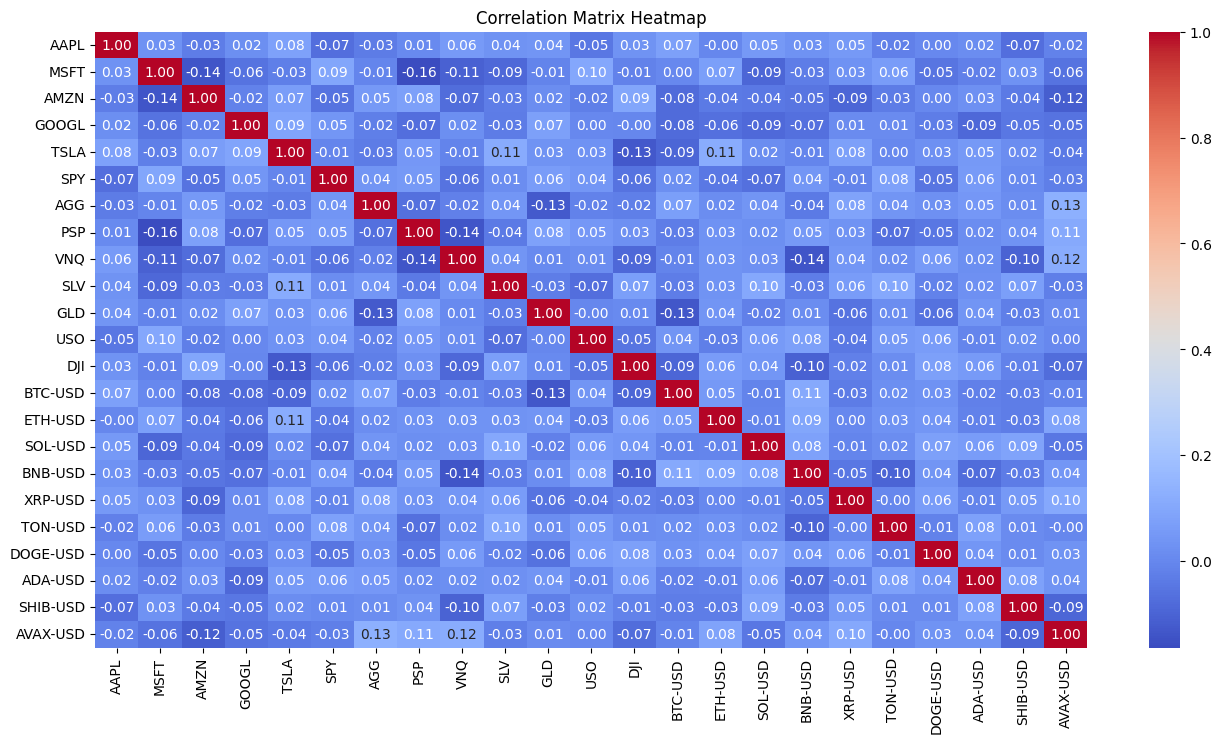

In [5]:

import seaborn as sns
import matplotlib.pyplot as plt

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()